<a href="https://colab.research.google.com/github/fabioVitorTavares/EFC1-GCC253---Complexidade-e-Projeto-de-Algoritmos/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Fábio Vitor Tavares Furtado

**Matricula**: 201811178

**Turma**: 14A

Link do repositório GitHub: https://github.com/fabioVitorTavares/EFC1-GCC253---Complexidade-e-Projeto-de-Algoritmos

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [2]:
import numpy
import time
import matplotlib.pyplot as plt

global_1=0

#Quantidade de arrays
quantidadeArray = 500

#Intervalo dos números randomicos
intervalo = 500



# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


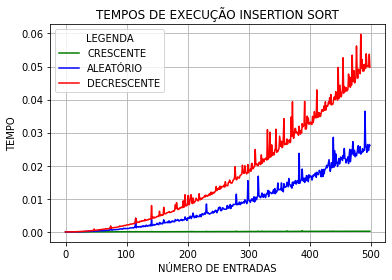

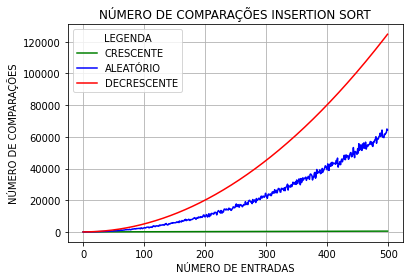

In [ ]:
def insertionSort(array):
    numeroComparacoes =  0
    timeInicio = time.time();
    for i in range(1, len(array)):        
        chave = array[i]
        j = i-1
        numeroComparacoes += 1
        while array[j] > chave and j > -1:
            numeroComparacoes += 1
            array[j+1] = array[j]
            j = j-1          
        array[j+1] = chave       
    return time.time() - timeInicio, numeroComparacoes


timesArrayOrdenadoCrescente = []
timesArrayAleatorio = []
timesArrayOrdenadoDecrescente = []
comparacoesArrayOrdenadoCrescente = []
comparacoesArrayAleatorio = []
comparacoesArrayOrdenadoDecrescente = []
numeroEntradas = []


for i in range(quantidadeArray):
    timesArrayOrdenadoCrescente.append(insertionSort(numpy.arange(0,i,1))[0])
    timesArrayAleatorio.append(insertionSort(numpy.random.randint(0, intervalo, i))[0])
    timesArrayOrdenadoDecrescente.append(insertionSort(numpy.arange(i-1,-1,-1))[0])
    comparacoesArrayOrdenadoCrescente.append(insertionSort(numpy.arange(0,i,1))[1])
    comparacoesArrayAleatorio.append(insertionSort(numpy.random.randint(0, intervalo, i))[1])
    comparacoesArrayOrdenadoDecrescente.append(insertionSort(numpy.arange(i-1,-1,-1))[1])
    numeroEntradas.append(i)


plt.title("TEMPOS DE EXECUÇÃO INSERTION SORT")
plt.plot(numeroEntradas,timesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,timesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,timesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("TEMPO")
plt.show()


plt.title("NÚMERO DE COMPARAÇÕES INSERTION SORT")
plt.plot(numeroEntradas,comparacoesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,comparacoesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,comparacoesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("NÚMERO DE COMPARAÇÕES")
plt.show()

##  Merge Sort


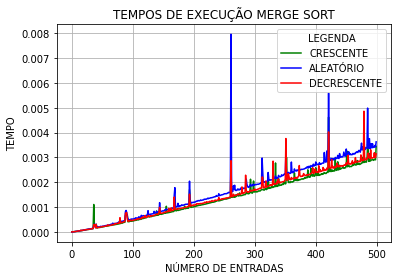

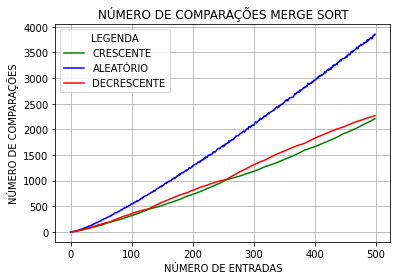

In [ ]:
def merge(arr, numeroComparacoes):    
    if(len(arr) > 1):        
        arrE = arr[:int(len(arr)/2)]
        arrD = arr[int(len(arr)/2):]       
        arrE = merge(arrE, numeroComparacoes)
        arrD = merge(arrD, numeroComparacoes)
        arr = sort(arrE, arrD, numeroComparacoes)        
        return arr
    return arr    


def sort(arrE,arrD, numeroComparacoes):   
    arrO = []
    while len(arrE) > 0 and len(arrD) > 0:
        numeroComparacoes[0] += 1           
        if arrE[0] < arrD[0]:
            arrO.append(arrE[0])
            arrE = arrE[1:]
        else:
            arrO.append(arrD[0])
            arrD = arrD[1:]    
    while len(arrE) > 0:        
        arrO.append(arrE[0])
        arrE = arrE[1:]
    while len(arrD) > 0:          
        arrO.append(arrD[0])
        arrD = arrD[1:]   
    return arrO


def mergeSort(arr):
    numeroComparacoes = [0]    
    timeInicial = time.time()
    merge(arr, numeroComparacoes)
    return time.time() - timeInicial, numeroComparacoes


timesArrayOrdenadoCrescente = []
timesArrayAleatorio = []
timesArrayOrdenadoDecrescente = []
comparacoesArrayOrdenadoCrescente = []
comparacoesArrayAleatorio = []
comparacoesArrayOrdenadoDecrescente = []
numeroEntradas = []


for i in range(quantidadeArray):
    timesArrayOrdenadoCrescente.append(mergeSort(numpy.arange(0,i,1))[0])
    timesArrayAleatorio.append(mergeSort(numpy.random.randint(0, intervalo, i))[0])
    timesArrayOrdenadoDecrescente.append(mergeSort(numpy.arange(i-1,-1,-1))[0])
    comparacoesArrayOrdenadoCrescente.append(mergeSort(numpy.arange(0,i,1))[1])
    comparacoesArrayAleatorio.append(mergeSort(numpy.random.randint(0, intervalo, i))[1])
    comparacoesArrayOrdenadoDecrescente.append(mergeSort(numpy.arange(i-1,-1,-1))[1])
    numeroEntradas.append(i)


plt.title("TEMPOS DE EXECUÇÃO MERGE SORT")
plt.plot(numeroEntradas,timesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,timesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,timesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("TEMPO")
plt.show()


plt.title("NÚMERO DE COMPARAÇÕES MERGE SORT")
plt.plot(numeroEntradas,comparacoesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,comparacoesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,comparacoesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("NÚMERO DE COMPARAÇÕES")
plt.show()

##  Selection Sort


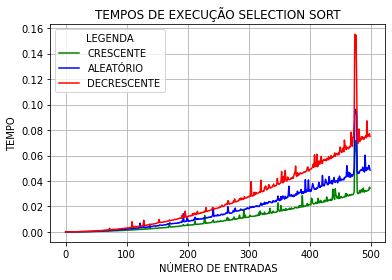

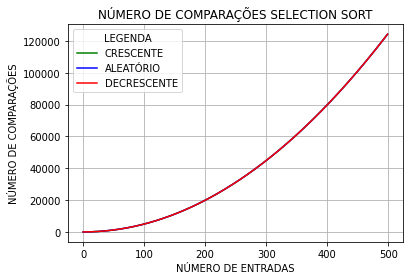

In [ ]:
def selectionSort(array):
    numeroComparacoes = 0
    timeInicio = time.time();    
    for i in range(len(array)):        
        for j in range(i+1,len(array)):
            numeroComparacoes += 1
            if(array[j] < array[i]):
                array[i], array[j] = array[j], array[i]   
    return time.time() - timeInicio, numeroComparacoes        
        


timesArrayOrdenadoCrescente = []
timesArrayAleatorio = []
timesArrayOrdenadoDecrescente = []
comparacoesArrayOrdenadoCrescente = []
comparacoesArrayAleatorio = []
comparacoesArrayOrdenadoDecrescente = []
numeroEntradas = []


for i in range(quantidadeArray):
    timesArrayOrdenadoCrescente.append(selectionSort(numpy.arange(0,i,1))[0])
    timesArrayAleatorio.append(selectionSort(numpy.random.randint(0, intervalo, i))[0])
    timesArrayOrdenadoDecrescente.append(selectionSort(numpy.arange(i-1,-1,-1))[0])
    comparacoesArrayOrdenadoCrescente.append(selectionSort(numpy.arange(0,i,1))[1])
    comparacoesArrayAleatorio.append(selectionSort(numpy.random.randint(0, intervalo, i))[1])
    comparacoesArrayOrdenadoDecrescente.append(selectionSort(numpy.arange(i-1,-1,-1))[1])
    numeroEntradas.append(i)


plt.title("TEMPOS DE EXECUÇÃO SELECTION SORT")
plt.plot(numeroEntradas,timesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,timesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,timesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("TEMPO")
plt.show()


plt.title("NÚMERO DE COMPARAÇÕES SELECTION SORT")
plt.plot(numeroEntradas,comparacoesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,comparacoesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,comparacoesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("NÚMERO DE COMPARAÇÕES")
plt.show()


##  Bubble Sort


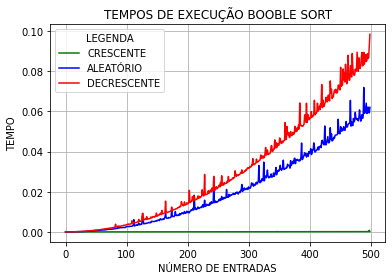

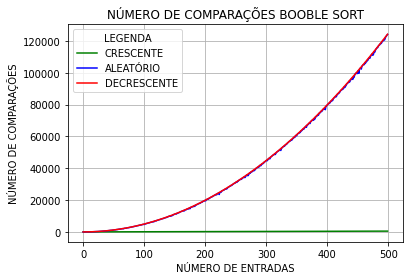

In [ ]:
def boobleSort(arr):
    numeroComparacoes = 0
    timeInicial = time.time()
    trocou = True
    for i in range(len(arr)-1):        
        if(trocou):
            trocou = False
            for j in range(len(arr)-i-1):
                numeroComparacoes += 1
                if (arr[j] > arr[j+1]):
                    arr[j],arr[j+1] = arr[j+1], arr[j]
                    trocou = True
    return time.time() - timeInicial, numeroComparacoes

timesArrayOrdenadoCrescente = []
timesArrayAleatorio = []
timesArrayOrdenadoDecrescente = []
comparacoesArrayOrdenadoCrescente = []
comparacoesArrayAleatorio = []
comparacoesArrayOrdenadoDecrescente = []
numeroEntradas = []


for i in range(quantidadeArray):
    timesArrayOrdenadoCrescente.append(boobleSort(numpy.arange(0,i,1))[0])
    timesArrayAleatorio.append(boobleSort(numpy.random.randint(0, intervalo, i))[0])
    timesArrayOrdenadoDecrescente.append(boobleSort(numpy.arange(i-1,-1,-1))[0])
    comparacoesArrayOrdenadoCrescente.append(boobleSort(numpy.arange(0,i,1))[1])
    comparacoesArrayAleatorio.append(boobleSort(numpy.random.randint(0, intervalo, i))[1])
    comparacoesArrayOrdenadoDecrescente.append(boobleSort(numpy.arange(i-1,-1,-1))[1])
    numeroEntradas.append(i)


plt.title("TEMPOS DE EXECUÇÃO BOOBLE SORT")
plt.plot(numeroEntradas,timesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,timesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,timesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("TEMPO")
plt.show()


plt.title("NÚMERO DE COMPARAÇÕES BOOBLE SORT")
plt.plot(numeroEntradas,comparacoesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,comparacoesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,comparacoesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("NÚMERO DE COMPARAÇÕES")
plt.show()

## Heap Sort

In [ ]:
def heapSort():
  
  return

## Quick Sort

> pivo = *A[A-comprimento]*

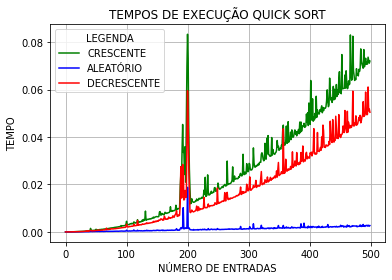

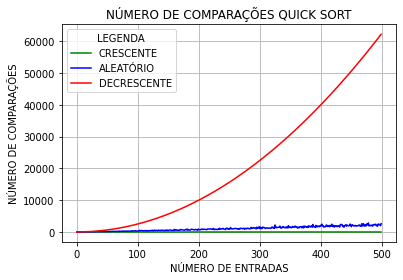

In [10]:

def particao(arr, ini, fim, numeroComparacoes):    
    pivo = arr[fim]
    me = ini-1
    ma = ini-1
    for i in range(ini, fim+1):
                
        if arr[i] > pivo:
            numeroComparacoes += 1
            ma += 1
        else:
            me += 1
            ma += 1
            arr[ma], arr[me] = arr[me], arr[ma]
    return me, numeroComparacoes

def quick(arr, ini, fim, numeroComparacoes):     

    if ini < fim:
        pp, numeroComparacoes = particao(arr, ini, fim, numeroComparacoes)
        numeroComparacoes = quick(arr, ini, pp-1, numeroComparacoes)
        numeroComparacoes = quick(arr, pp+1, fim, numeroComparacoes)
    
    return numeroComparacoes

    

def quickSort(arr):
    numeroComparacoes = 0
    timeInicial = time.time()
    numeroComparacoes = quick(arr, 0, len(arr)-1, numeroComparacoes)
    return time.time() - timeInicial, numeroComparacoes
    

timesArrayOrdenadoCrescente = []
timesArrayAleatorio = []
timesArrayOrdenadoDecrescente = []
comparacoesArrayOrdenadoCrescente = []
comparacoesArrayAleatorio = []
comparacoesArrayOrdenadoDecrescente = []
numeroEntradas = []


for i in range(quantidadeArray):
    timesArrayOrdenadoCrescente.append(quickSort(numpy.arange(0,i,1))[0])
    timesArrayAleatorio.append(quickSort(numpy.random.randint(0, intervalo, i))[0])
    timesArrayOrdenadoDecrescente.append(quickSort(numpy.arange(i-1,-1,-1))[0])
    comparacoesArrayOrdenadoCrescente.append(quickSort(numpy.arange(0,i,1))[1])
    comparacoesArrayAleatorio.append(quickSort(numpy.random.randint(0, intervalo, i))[1])
    comparacoesArrayOrdenadoDecrescente.append(quickSort(numpy.arange(i-1,-1,-1))[1])
    numeroEntradas.append(i)


plt.title("TEMPOS DE EXECUÇÃO QUICK SORT")
plt.plot(numeroEntradas,timesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,timesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,timesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("TEMPO")
plt.show()


plt.title("NÚMERO DE COMPARAÇÕES QUICK SORT")
plt.plot(numeroEntradas,comparacoesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,comparacoesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,comparacoesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("NÚMERO DE COMPARAÇÕES")
plt.show()

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
print("Boa sorte!!!")

Boa sorte!!!
